<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Ionization_E_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook serves to further investigate the effects of increasing ionization energy at a constant phthalate concentration on the total peak area of the analytes in the total ion current chromatogram.

*Input:* The the peak list files (classic structure, header = 6, by thermofisher) are uploaded to the directory titeled *Ionization_E_plot*, it is of key importance that the title of the files follows the format: *Mix_4ug_ml_i_xxeV_pl.csv*
Any changes to filename, path or other changes that might impact the file significantly need to be comented extensively.

The following code serves to import the librarys and mount the google drive.

In [1]:
import numpy as np
from google.colab import drive
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive', force_remount = True)

# Set path to the folder containing the CSV files
path = '/content/drive/My Drive/Ionization_E_plot'

# Get a list of all CSV files in the folder
files = glob.glob(path + '/Mix_4ug*.csv')

Mounted at /content/drive


The following code loops over all the files in the working direcory and filters out the signals of the phthalates with *mask1* and *mask2*. These parameters might need to be adjusted to ensure that only the 6 phthalates are copied into the output files (*Mix_4ug_ml_i_xxeV_pl_filtered.csv*) which are stored in the google drive/working directory.

In [19]:
# Loop over the CSV files and load the data into NumPy arrays
for file in files:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file, header = 7)

    # Find rows with values larger than 2 and smaller than 10 in the first column
    mask1 = (df.iloc[:, 4] > 2) & (df.iloc[:, 4] < 10)
    # Exclude rows below a value of 3 in the second column
    mask2 = (df.iloc[:, 0] >= 6)
    #combine masks
    mask= mask1 & mask2
    filtered_df = df[mask]
    
    # Save the filtered rows to a new CSV file
    filtered_file = file.replace('.csv', '_filtered.csv')
    filtered_df.to_csv(filtered_file, index=False)

    # Print the number of rows saved to the new file
    print(f"Saved {len(filtered_df)} rows to {filtered_file}")

Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_2_16eV_pl_filtered.csv
Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_2_40eV_pl_filtered.csv
Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_2_70eV_pl_filtered.csv
Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_1_16eV_pl_filtered.csv
Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_1_40eV_pl_filtered.csv
Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_1_70eV_pl_filtered.csv


The following code compines 16 eV filtere files to an mean value file titeled: *Mix_4ug_ml_16eV_mean.csv*
which is saved in the working google drive folder. Unfortunately these values are currently not representative, as the code seems to have an error.

In [21]:
# Get a list of all files with the specified pattern
all_files = sorted(glob.glob(path + "/Mix_4ug_ml_*_16eV_pl_filtered.csv"))

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all files and append each dataframe to the list
for filename in all_files:
    df = pd.read_csv(filename, header=None)
    dataframes.append(df)

print(dataframes)
# Concatenate all dataframes along the 3rd dimension (axis=2)
combined_df = pd.concat(dataframes, axis=1)

print('.............................')
print(combined_df)
# Calculate the mean of each datapoint across all files (axis=2)
mean_df = combined_df.mean(axis=1)
print(mean_df)
# Save the mean dataframe to a new file
mean_df.to_csv('/content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_16eV_mean.csv', header=None, index=None)

[       0      1      2             3     4             5     6
0   0.13   0.11   0.92  9.685421e+07  0.05  3.619721e+06  0.01
1   6.22   6.14   6.52  4.021189e+09  2.07  2.565825e+09  5.32
2   7.75   7.63   7.85  4.440476e+09  2.28  2.447983e+09  5.08
3  13.34  13.12  13.65  6.170831e+09  3.17  2.495549e+09  5.17
4  18.65  18.55  18.88  6.266202e+09  3.22  3.336026e+09  6.92
5  20.43  20.37  20.75  6.633049e+09  3.41  3.560301e+09  7.38
6  22.02  21.81  22.35  7.116444e+09  3.66  3.933659e+09  8.16,        0      1      2             3      4             5      6
0   1.86   1.29   1.98  9.823041e+10  37.80  1.038661e+10  13.12
1   6.21   6.13   6.51  5.414277e+09   2.08  3.720488e+09   4.70
2   7.74   7.62   7.84  6.569123e+09   2.53  3.669896e+09   4.63
3  13.34  13.12  13.63  9.138311e+09   3.52  3.995123e+09   5.04
4  18.65  18.55  18.88  8.717659e+09   3.35  4.464954e+09   5.64
5  20.44  20.37  20.76  1.089233e+10   4.19  6.412097e+09   8.10
6  22.02  21.94  22.48  1.080989e+10   

The following code compines 40 eV filtere files to an mean value file titeled: *Mix_4ug_ml_40eV_mean.csv*
which is saved in the working google drive folder. Unfortunately these values are currently not representative, as the code seems to have an error.

In [ ]:
# Get a list of all files with the specified pattern
all_files = sorted(glob.glob(path + "/Mix_4ug_ml_*_40eV_pl_filtered.csv"))

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all files and append each dataframe to the list
for filename in all_files:
    df = pd.read_csv(filename, header=None)
    dataframes.append(df)

# Concatenate all dataframes along the 3rd dimension (axis=2)
combined_df = pd.concat(dataframes, axis=1)

# Calculate the mean of each datapoint across all files (axis=2)
mean_df = combined_df.mean(axis=1)

# Save the mean dataframe to a new file
mean_df.to_csv('/content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_40eV_mean.csv', header=None, index=None)

The following code compines 70 eV filtere files to an mean value file titeled: *Mix_4ug_ml_70eV_mean.csv*
which is saved in the working google drive folder. Unfortunately these values are currently not representative, as the code seems to have an error.

In [ ]:
# Get a list of all files with the specified pattern
all_files = sorted(glob.glob(path + "/Mix_4ug_ml_*_70eV_pl_filtered.csv"))

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all files and append each dataframe to the list
for filename in all_files:
    df = pd.read_csv(filename, header=None)
    dataframes.append(df)

# Concatenate all dataframes along the 3rd dimension (axis=2)
combined_df = pd.concat(dataframes, axis=1)

# Calculate the mean of each datapoint across all files (axis=2)
mean_df = combined_df.mean(axis=1)

# Save the mean dataframe to a new file
mean_df.to_csv('/content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_70eV_mean.csv', header=None, index=None)

<ipython-input-19-3a4c8592effc>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_df = combined_df.mean(axis=1)


The following scripd calculates the standard deviation of the 16 eV which is saved in the working directory on the google drive with the change of _mean.csv to _std.csv.

In [ ]:
# Get a list of all files with the specified pattern
all_files = sorted(glob.glob(path + "/Mix_4ug_ml_*_16eV_pl_filtered.csv"))

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all files and append each dataframe to the list
for filename in all_files:
    df = pd.read_csv(filename, header=None)
    dataframes.append(df)

# Concatenate all dataframes along the 3rd dimension (axis=2)
combined_df = pd.concat(dataframes, axis=1)

# Calculate the standard deviation of each datapoint across all files (axis=1)
std_df = combined_df.std(axis=1)

# Save the standard deviation dataframe to a new file
std_df.to_csv('/content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_16eV_std.csv', header=None, index=None)

<ipython-input-27-2fa8ea559d66>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_df = combined_df.std(axis=1)


The following scripd calculates the standard deviation of the 40 eV which is saved in the working directory on the google drive with the change of _mean.csv to _std.csv.

In [ ]:
# Get a list of all files with the specified pattern
all_files = sorted(glob.glob(path + "/Mix_4ug_ml_*_40eV_pl_filtered.csv"))

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all files and append each dataframe to the list
for filename in all_files:
    df = pd.read_csv(filename, header=None)
    dataframes.append(df)

# Concatenate all dataframes along the 3rd dimension (axis=2)
combined_df = pd.concat(dataframes, axis=1)

# Calculate the standard deviation of each datapoint across all files (axis=1)
std_df = combined_df.std(axis=1)

# Save the standard deviation dataframe to a new file
std_df.to_csv('/content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_40eV_std.csv', header=None, index=None)

The following scripd calculates the standard deviation of the 70 eV which is saved in the working directory on the google drive with the change of _mean.csv to _std.csv.

In [ ]:
# Get a list of all files with the specified pattern
all_files = sorted(glob.glob(path + "/Mix_4ug_ml_*_70eV_pl_filtered.csv"))

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all files and append each dataframe to the list
for filename in all_files:
    df = pd.read_csv(filename, header=None)
    dataframes.append(df)

# Concatenate all dataframes along the 3rd dimension (axis=2)
combined_df = pd.concat(dataframes, axis=1)

# Calculate the standard deviation of each datapoint across all files (axis=1)
std_df = combined_df.std(axis=1)

# Save the standard deviation dataframe to a new file
std_df.to_csv('/content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_70eV_std.csv', header=None, index=None)

<ipython-input-29-7bb606e8db46>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_df = combined_df.std(axis=1)


The following code takes the mean files and creates an xy-plot to visualize the summarized data.

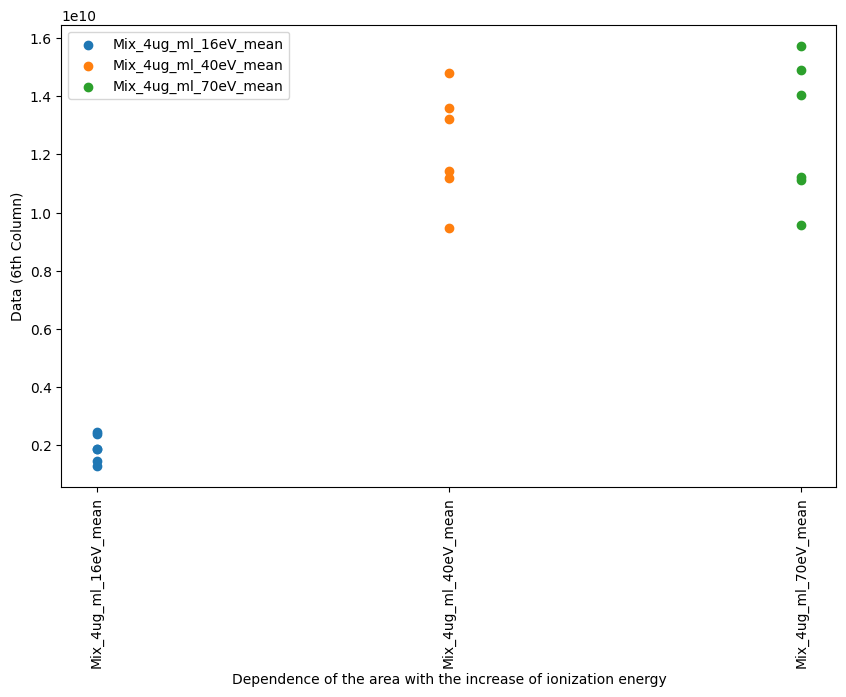

In [ ]:
# Get a list of all filtered CSV files in the folder
files = glob.glob(path + '/Mix_4ug_*_mean.csv')

# Create an empty list to store the data and file names
data = []
names = []

# Loop over the filtered CSV files and load the data into NumPy arrays
for file in files:
  # Load the CSV file into a pandas DataFrame
  df = pd.read_csv(file)

  # Add the data and file name to the lists
  data.append(df.iloc[:, 0])
  names.append(file.split('/')[-1].split('.')[0])

# Plot the data as a scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(data)):
  plt.scatter([names[i]] * len(data[i]), data[i], label=names[i])

# Set the x-axis label and rotate the labels
plt.xlabel('Dependence of the area with the increase of ionization energy')
plt.xticks(rotation=90)

# Set the y-axis
plt.ylabel('Data (6th Column)')

# Add a legend and show the plot
plt.legend()
plt.show()

The following code plots the data and implements the error bars, correlating to the standard deviation of each datapoint. As with the plot before, it seems to contain major errors due to false imputs from the mean and std file. This needs to be debugged and changed accordingly.

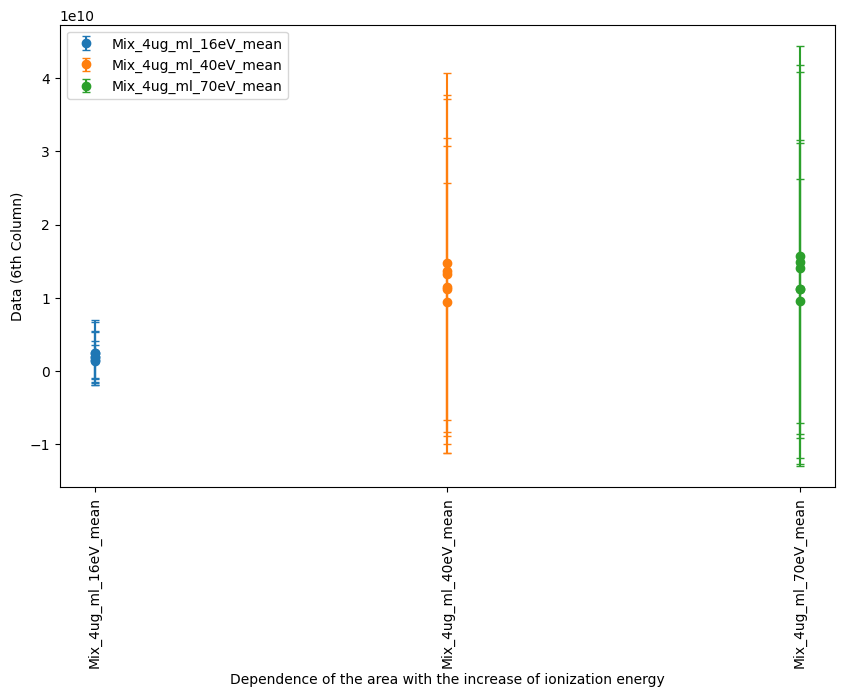

In [ ]:
# Get a list of all filtered CSV files in the folder
files = glob.glob(path + '/Mix_4ug_*_mean.csv')

# Create an empty list to store the data, file names, and standard deviation values
data = []
names = []
std_devs = []

# Loop over the filtered CSV files and load the data into NumPy arrays
for file in files:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file)

    # Add the data and file name to the lists
    data.append(df.iloc[:, 0])
    names.append(file.split('/')[-1].split('.')[0])

    # Load the standard deviation CSV file into a pandas DataFrame
    std_file = file.replace('_mean.csv', '_std.csv')
    std_df = pd.read_csv(std_file)

    # Add the standard deviation values to the list
    std_devs.append(std_df.iloc[:, 0])

# Plot the data as a scatter plot with error bars
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.errorbar([names[i]] * len(data[i]), data[i], yerr=std_devs[i],
                 fmt='o', capsize=3, label=names[i])

# Set the x-axis label and rotate the labels
plt.xlabel('Dependence of the area with the increase of ionization energy')
plt.xticks(rotation=90)

# Set the y-axis
plt.ylabel('Data (6th Column)')

# Add a legend and show the plot
plt.legend()
plt.show()
